# M5 data

This experiment aims to compare the performance of the AmazonForecast automated solutions against classical statistical models using StatsForecast using the M5 dataset.

In this notebook we will explain the data used in the experiment.

In [ ]:
import pandas as pd

from statsforecast import StatsForecast

## Target data

In [ ]:
train_df =  pd.read_parquet('s3://m5-benchmarks/data/train/target.parquet')

In [ ]:
train_df.head()

item_id   timestamp  demand
0  FOODS_1_001_CA_1  2011-01-29     3.0
1  FOODS_1_001_CA_1  2011-01-30     0.0
2  FOODS_1_001_CA_1  2011-01-31     0.0
3  FOODS_1_001_CA_1  2011-02-01     1.0
4  FOODS_1_001_CA_1  2011-02-02     4.0

In [ ]:
train_df = train_df.rename(columns={'item_id': 'unique_id', 
                                    'timestamp': 'ds',
                                    'demand': 'y'})

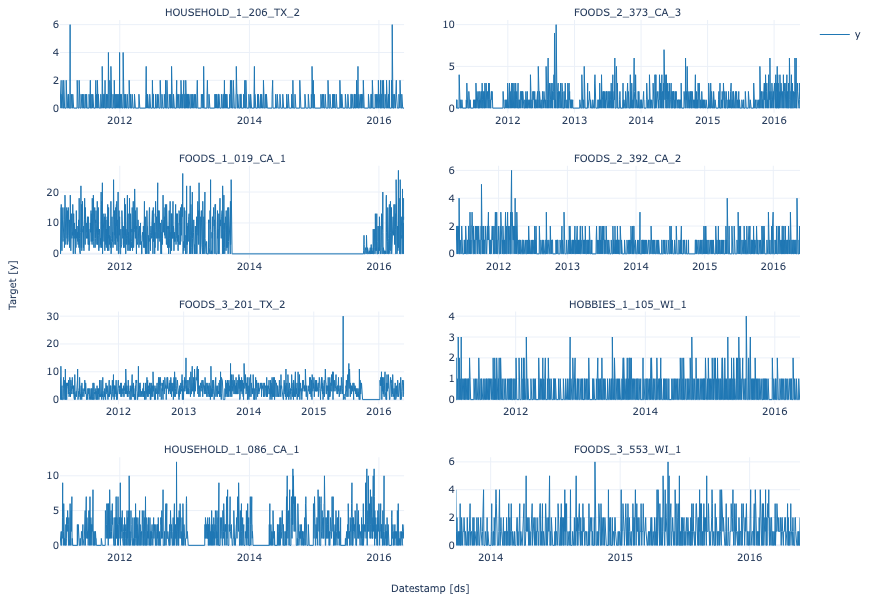

In [ ]:
StatsForecast.plot(train_df)

## Static variables

In [ ]:
static_df = pd.read_parquet('s3://m5-benchmarks/data/train/static.parquet')

In [ ]:
static_df.head()

item_id       sku_id  dept_id cat_id store_id state_id
0  FOODS_1_001_CA_1  FOODS_1_001  FOODS_1  FOODS     CA_1       CA
1  FOODS_1_001_CA_2  FOODS_1_001  FOODS_1  FOODS     CA_2       CA
2  FOODS_1_001_CA_3  FOODS_1_001  FOODS_1  FOODS     CA_3       CA
3  FOODS_1_001_CA_4  FOODS_1_001  FOODS_1  FOODS     CA_4       CA
4  FOODS_1_001_TX_1  FOODS_1_001  FOODS_1  FOODS     TX_1       TX

### Temporal variables

In [ ]:
temporal_df = pd.read_parquet('s3://m5-benchmarks/data/train/temporal.parquet')

In [ ]:
temporal_df.head()

item_id   timestamp  snap_CA  snap_TX  snap_WI  sell_price
0  FOODS_1_001_CA_1  2011-01-29      0.0      0.0      0.0         2.0
1  FOODS_1_001_CA_1  2011-01-30      0.0      0.0      0.0         2.0
2  FOODS_1_001_CA_1  2011-01-31      0.0      0.0      0.0         2.0
3  FOODS_1_001_CA_1  2011-02-01      1.0      1.0      0.0         2.0
4  FOODS_1_001_CA_1  2011-02-02      1.0      0.0      1.0         2.0

In [ ]:
temporal_df = temporal_df.rename(columns={'item_id': 'unique_id', 
                                          'timestamp': 'ds'})

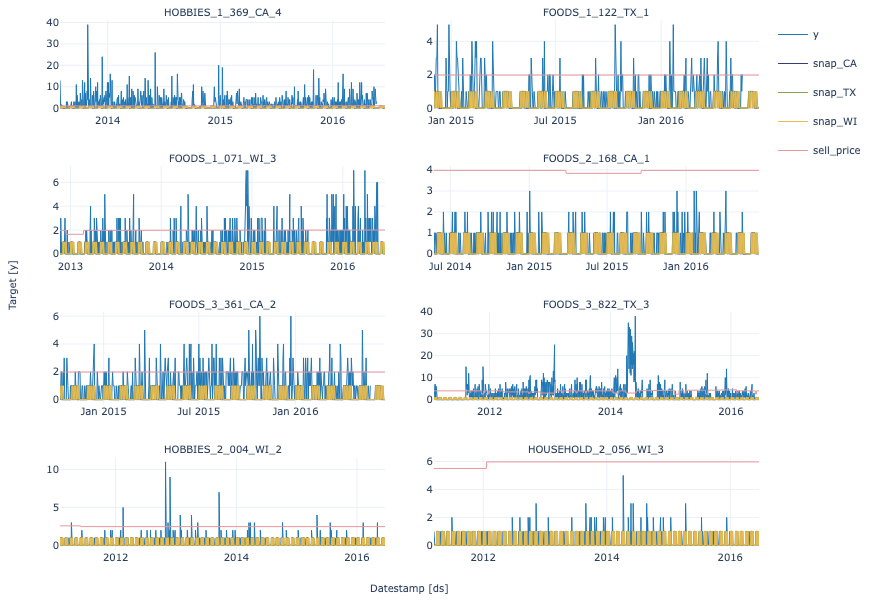

In [ ]:
StatsForecast.plot(train_df, temporal_df)